<a href="https://colab.research.google.com/github/quoctrungsz27/week10/blob/main/week10_CNN_Convolutional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
#(60000, 28*28), (50000), (10000,28,28)
     

4422102/4422102 [==============================] - 0s 0us/step


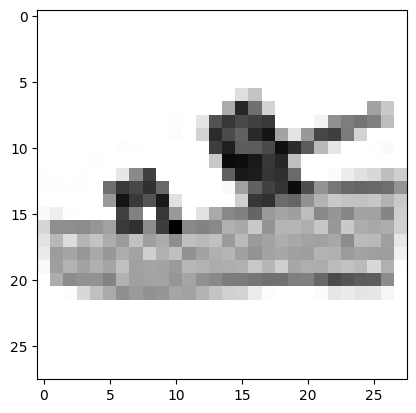

Cai nay la: 5


In [6]:

hinh = train_images[12]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show()
print("Cai nay la:", train_labels[12])

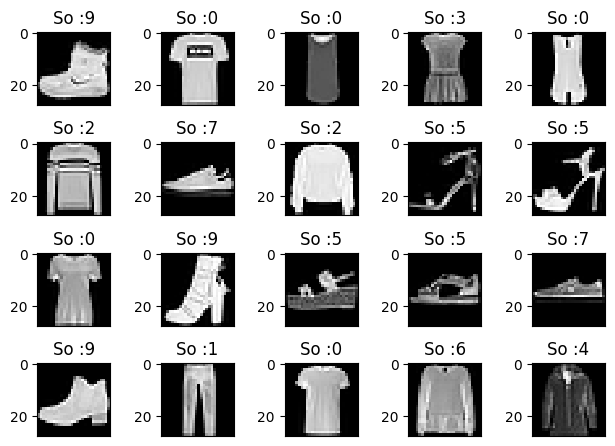

In [7]:

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap= 'gray', interpolation= 'none')
  plt.title("So " ":{}".format(train_labels[i]))
  plt.xticks([])
     

In [8]:

train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32')/255

In [9]:


test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32')/255

In [10]:

from keras.utils import to_categorical 
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
     

In [11]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import LeakyReLU
from keras.optimizers import Adam

batch_size = 64
epoch = 20
classes = 10

In [12]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'linear', input_shape= (28,28,1), padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(64, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 0.1))
model.add(MaxPooling2D((2,2), padding= 'same'))
model.add(Conv2D(128, (3,3), activation= 'linear', padding= 'same'))
model.add(LeakyReLU(alpha= 1))
model.add(MaxPooling2D((2,2), padding= 'same'))

#ANN
model.add(Flatten())
model.add(Dense(128, activation= 'linear'))
model.add(LeakyReLU(alpha= 0.1))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [14]:
from keras.backend import categorical_crossentropy
model.compile(loss= categorical_crossentropy, optimizer= Adam(), metrics= ['accuracy'])

In [15]:
train = model.fit(train_images, train_labels, batch_size= 64, epochs= 5, verbose= 1)

Epoch 1/5
938/938 [==============================] - 129s 136ms/step - loss: 0.4289 - accuracy: 0.8433
Epoch 2/5
938/938 [==============================] - 128s 136ms/step - loss: 0.2649 - accuracy: 0.9026
Epoch 3/5
938/938 [==============================] - 126s 135ms/step - loss: 0.2167 - accuracy: 0.9197
Epoch 4/5
938/938 [==============================] - 131s 140ms/step - loss: 0.1898 - accuracy: 0.9298
Epoch 5/5
938/938 [==============================] - 127s 135ms/step - loss: 0.1627 - accuracy: 0.9400


In [17]:
test_loss, test_acc = model.evaluate(train_images, train_labels)
print("Accurency:", test_acc)
print('Loss:', test_loss)
model.save('/content/drive/MyDrive/Colab Notebooks/week10_AI/Convolution_CNN.h5')

1875/1875 [==============================] - 43s 23ms/step - loss: 0.1340 - accuracy: 0.9501
Accurency: 0.9501166939735413
Loss: 0.133982852101326


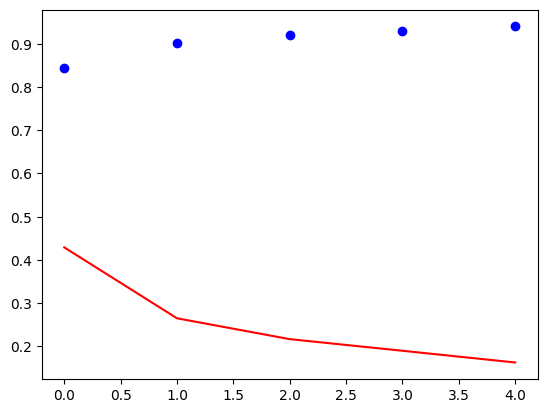

In [18]:
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()
